In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
links = ['https://www.basketball-reference.com/players/a/abdulka01.html','https://www.basketball-reference.com/players/m/malonka01.html','https://www.basketball-reference.com/players/b/bryanko01.html','https://www.basketball-reference.com/players/j/jamesle01.html','https://www.basketball-reference.com/players/n/nowitdi01.html','https://www.basketball-reference.com/players/c/chambwi01.html','https://www.basketball-reference.com/players/o/onealsh01.html']

In [3]:
columns = ["Name"]
for i in range(21):
    columns.append(str(i+1))

In [4]:
df = pd.DataFrame(columns = columns)

In [5]:
def dataset(link,name):

    links = requests.get(link)
    content = links.content
    soup = BeautifulSoup(content, "html.parser")
    name_ppgs = []
    tbody = soup.find("tbody")
    for tr in tbody.find_all("tr"):
        ppg = tr.find(attrs={"data-stat":"pts_per_g"}).text
        name_ppgs.append(ppg)
        
    name_ppgs.insert(0,name)
    return name_ppgs

In [6]:
names = ['Kareem Abdul-Jabbar','Karl Malone','Kobe Bryant','LeBron James','Dirk Nowitzki','Wilt Chamberlain', "Shaquille O'Neal",'Michael Jordan', ]
for i in range(len(links)):
    x = dataset(links[i],names[i])
    df.loc[len(df), "Name":str(len(x)-1)] = x


In [7]:
df

,Name,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Kareem Abdul-Jabbar,28.8,31.7,34.8,30.2,27.0,30.0,27.7,26.2,25.8,...,26.2,23.9,21.8,21.5,22.0,23.4,17.5,14.6,10.1,NaN
1,Karl Malone,14.9,21.7,27.7,29.1,31.0,29.0,28.0,27.0,25.2,...,27.4,27.0,23.8,25.5,23.2,22.4,20.6,13.2,NaN,NaN
2,Kobe Bryant,7.6,15.4,19.9,22.5,28.5,25.2,30.0,24.0,27.6,...,28.3,26.8,27.0,25.3,27.9,27.3,13.8,22.3,17.6,NaN
3,LeBron James,20.9,27.2,31.4,27.3,30.0,28.4,29.7,26.7,27.1,...,25.3,25.3,26.4,27.5,27.4,24.3,NaN,NaN,NaN,NaN
4,Dirk Nowitzki,8.2,17.5,21.8,23.4,25.1,21.8,26.1,26.6,24.6,...,25.0,23.0,21.6,17.3,21.7,17.3,18.3,14.2,12.0,7.3
5,Wilt Chamberlain,37.6,38.4,50.4,44.8,36.9,34.7,38.9,30.1,33.5,...,20.5,27.3,20.7,14.8,13.2,NaN,NaN,NaN,NaN,NaN
6,Shaquille O'Neal,23.4,29.3,29.3,26.6,26.2,28.3,26.3,29.7,28.7,...,21.5,22.9,20.0,17.3,13.6,14.2,12.9,17.8,12.0,9.2


In [8]:
###
# Code for Michael Jordan
###
links = requests.get('https://www.basketball-reference.com/players/j/jordami01.html')
content = links.content
soup = BeautifulSoup(content, "html.parser")
name_ppgs = []
tbody = soup.find("tbody")
for tr in tbody.find_all("tr"):
    if 'Did Not Play' in tr.text:
        continue
    else:
        ppg = tr.find(attrs={"data-stat":"pts_per_g"}).text
        name_ppgs.append(ppg)
        
name_ppgs.insert(0,'Michael Jordan')
df.loc[len(df), "Name":str(len(x)-7)] = name_ppgs

In [9]:
# Convert columns to float64 for visualization
for i in range(21):
    df[str(i+1)] = df[str(i+1)].astype('float64')

Name     object
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8       float64
9       float64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
dtype: object

Text(236.5, 0.5, 'Players')

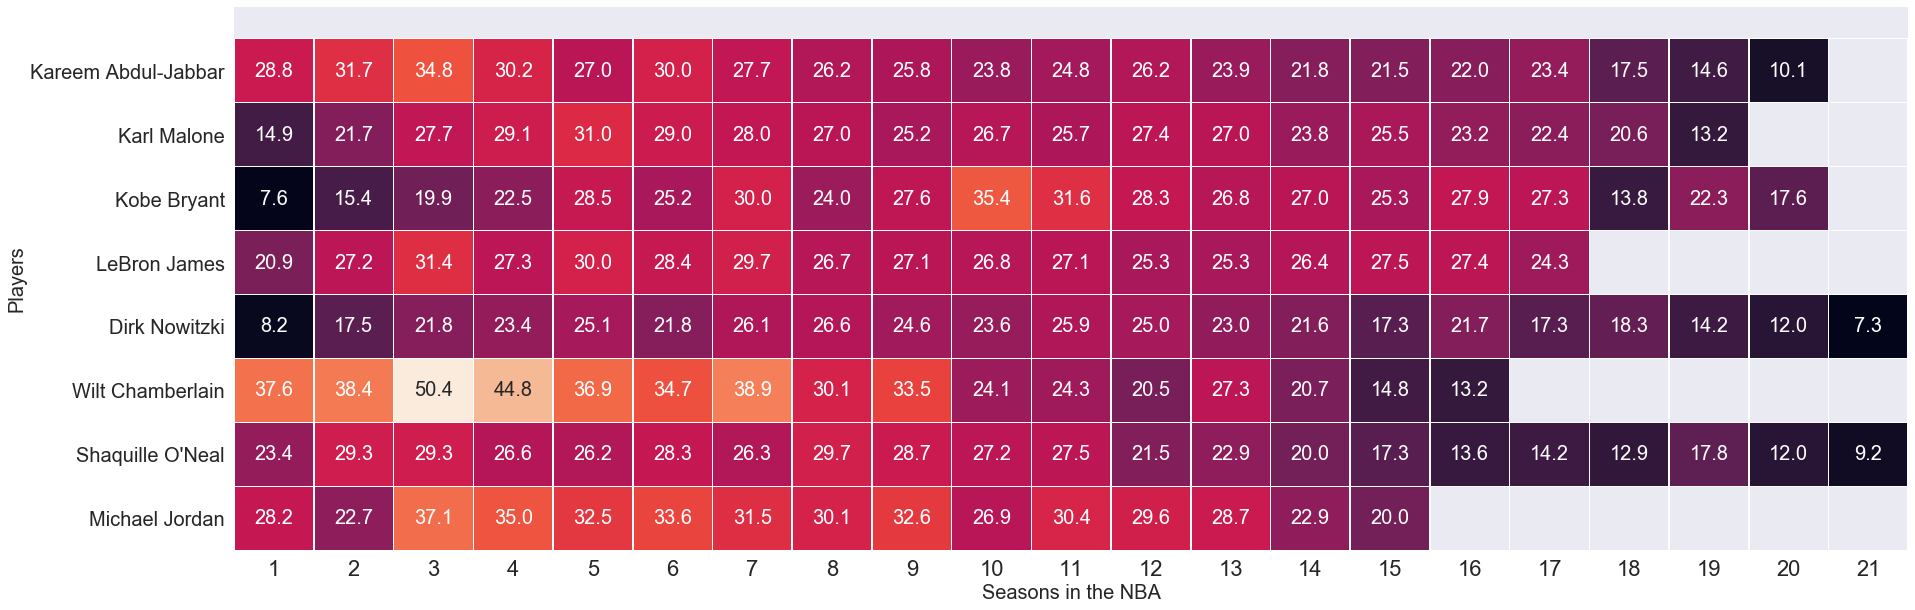

In [10]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(30,10))
hello = sns.heatmap(df.loc[:,"1":],linewidths=.5,annot=True,annot_kws={"size": 20}, fmt=".1f", cbar = False)
hello.set_yticklabels(names, fontsize = 20)
plt.yticks(rotation=0)
hello.set_ylim(len(names), -0.5,0.5)
xxx = df.loc[:,"1":].values
plt.xlabel("Seasons in the NBA", fontsize=20)
plt.ylabel("Players", fontsize=20)
